In [45]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
pd.set_option('display.precision', 2)

In [46]:
df = pd.read_csv('telecom.csv', index_col=0)
df.head()

,Average_SMS_per_day,Average_Call_Duration_per_day
USER_ID,,
0,17,6.37
1,16,11.61
2,13,11.21
3,14,13.23
4,11,9.13


In [55]:
## Fit a GMM model with 2 clusters 
gmm = GaussianMixture(n_components = 2, random_state = 0)
gmm.fit(df)

labels = gmm.predict(df)

X  = df.copy()

X['Cluster'] = labels

## Mean, Covariances, and Weights
print("Means:\n", gmm.means_)
print("\nCovariances:\n", gmm.covariances_)
print("\nWeights:\n", gmm.weights_)

Means:
 [[ 6.17916012  7.27613766]
 [28.11850296 20.23686383]]

Covariances:
 [[[ 12.78974389   3.18100086]
  [  3.18100086   5.80976516]]

 [[ 34.29396124 -38.36761291]
  [-38.36761291 101.00730158]]]

Weights:
 [0.68329916 0.31670084]


Since we have a bivariate model with 2 Guassian components, we are expecting 2 mixing coefficients (for each Gaussian component), 2 mean vectors of size 1x2 (per feature), and 2 covariance matrices of 2x2.

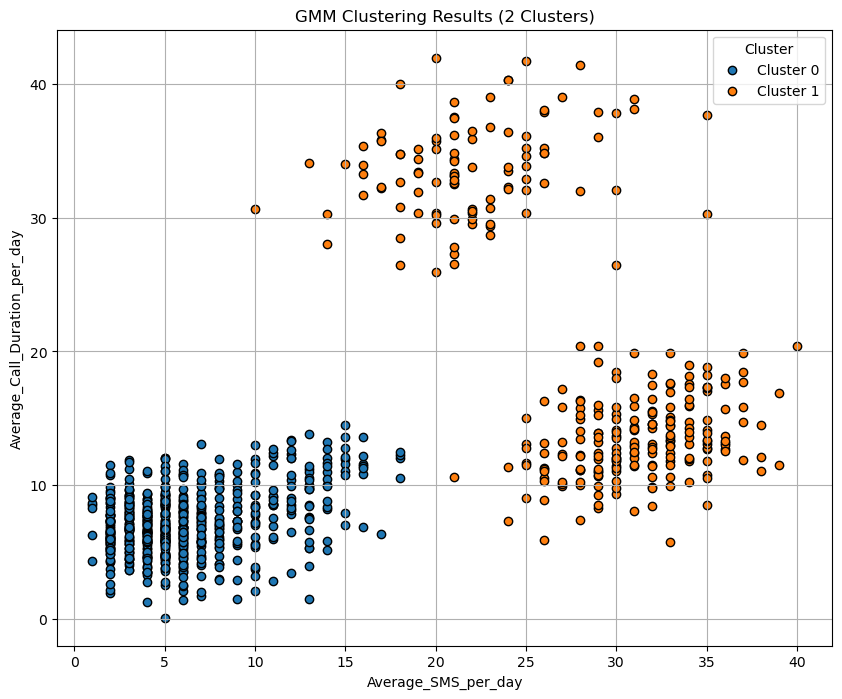

In [64]:
plt.figure(figsize=(10, 8))

for cluster in X['Cluster'].unique():
    cluster_data = X[X['Cluster'] == cluster]
    plt.scatter(cluster_data['Average_SMS_per_day'], cluster_data['Average_Call_Duration_per_day'], label=f'Cluster {cluster}', edgecolor='k')

plt.title("GMM Clustering Results (2 Clusters)")
plt.xlabel("Average_SMS_per_day")
plt.ylabel("Average_Call_Duration_per_day")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [49]:
## Silhouette Score and Log Likelihood
log_likelihood_2 = gmm.score(df)
print("Mean Log-Likelihood (k = 2):", log_likelihood_2)

silhouette_2 = silhouette_score(X, labels)
print("Silhouette Score (k = 2):", silhouette_2)

Mean Log-Likelihood (k = 2): -6.083804196410974
Silhouette Score (k = 2): 0.7096827702434907


In [50]:
## 3 Gaussian components analysis
gmm_3 = GaussianMixture(n_components = 3, random_state = 0)
gmm_3.fit(df)
labels_3 = gmm_3.predict(df)

log_likelihood_3 = gmm_3.score(df)
print("Mean Log-Likelihood (k = 3):", log_likelihood_3)

silhouette_3 = silhouette_score(df, labels_3)
print("Silhouette Score (k = 3):", silhouette_3)

Mean Log-Likelihood (k = 3): -5.851205254472661
Silhouette Score (k = 3): 0.7666784878282827


In [53]:
# Grid search from 2 to 10 clusters
log_likelihoods = []
silhouettes = []

for k in range(2, 11):
    gmm_k = GaussianMixture(n_components = k)
    gmm_k.fit(df)
    labels_k = gmm_k.predict(df)
    
    log_likelihoods.append(gmm_k.score(df))
    silhouettes.append(silhouette_score(df, labels_k))

# Print results
for i, k in enumerate(range(2, 11)):
    print(f"k = {k}: Log-Likelihood = {log_likelihoods[i]:.4f}, Silhouette Score = {silhouettes[i]:.4f}")


k = 2: Log-Likelihood = -6.0838, Silhouette Score = 0.7095
k = 3: Log-Likelihood = -5.8512, Silhouette Score = 0.7667
k = 4: Log-Likelihood = -5.7162, Silhouette Score = 0.5874
k = 5: Log-Likelihood = -5.7156, Silhouette Score = 0.4460
k = 6: Log-Likelihood = -5.7128, Silhouette Score = 0.4136
k = 7: Log-Likelihood = -5.7081, Silhouette Score = 0.3745
k = 8: Log-Likelihood = -5.7052, Silhouette Score = 0.3483
k = 9: Log-Likelihood = -5.6826, Silhouette Score = 0.3316
k = 10: Log-Likelihood = -5.7035, Silhouette Score = 0.3114


To better interpret the results of the evaluation metrics, we can plot them side-by-side to observe the trends and patterns.

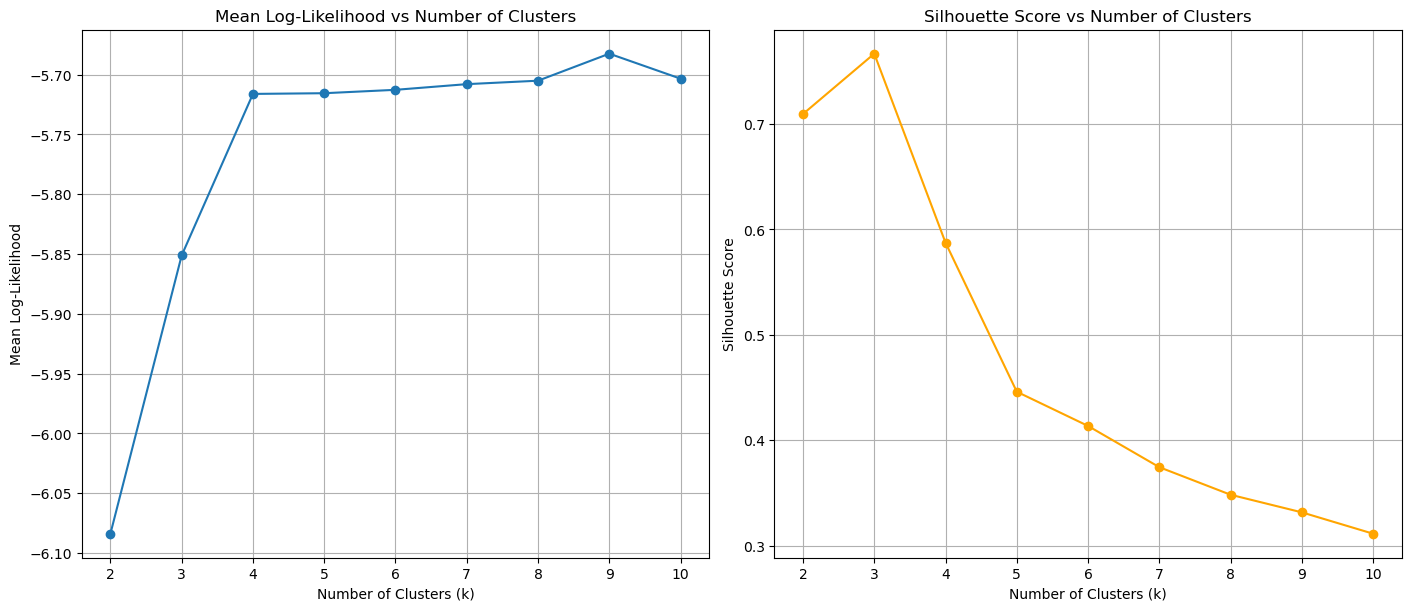

In [54]:
# Plotting with better layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout = True)

# Log-Likelihood plot
axes[0].plot(range(2, 11), log_likelihoods, marker = 'o', linestyle = '-')
axes[0].set_title("Mean Log-Likelihood vs Number of Clusters")
axes[0].set_xlabel("Number of Clusters (k)")
axes[0].set_ylabel("Mean Log-Likelihood")
axes[0].grid(True)

# Silhouette Score plot
axes[1].plot(range(2, 11), silhouettes, marker = 'o', linestyle = '-', color = 'orange')
axes[1].set_title("Silhouette Score vs Number of Clusters")
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Silhouette Score")
axes[1].grid(True)

plt.show()

The left and right figures, corresponding to log-likelihood and silhouette scores respectively, illustrates the change of each value as the number of clusters increase. We observe that the log likelihood generally increases as the number of clusters increase, while the silhouette score generally decreases as the number of clusters increase. 

## Compare the results and decide which number of clusters yields the best model.
Based on the log-likelihood and silhouette score results, the most appropriate model is GMM with 3 components. Looking at the log-likelihood, we observe that the log-likelihood greatly increases for both $k = 3$ and $k = 4$. Looking at the silhouette score, we observe that the highest value obtained, 0.7667, corresponds to the GMM with 3 components. Then, the sillhouete score for GMM with 4 components drastically decreases to 0.5874. A combination of both these components informs us that the 3 component model is the best to describe the data.

## How do log-likelihood and silhouette score complement each other in evaluating clustering performance?
We want to increase both the log-likelihood and silhouette score to identify the best set of parameters to describe the data. In this scenario, we have the graph to validate our conclusion of 3 componenets. From $k = 3$ to $k = 4$, although the log-likelihood increases, the silhouette score drastically decreases. This may be an effect of data overfitting. Because each metric captures different aspects of the model, evaluating using multiple metrics allows us to guage the fitness of the model holistically. In other words, evaluating the metrics conjuctively can be helpful in validating the results of each other.

## Does the highest silhouette score from k = 2 to 10 always indicate the best number of clusters? Why or why not?
For Gaussian Mixture Models, the highest silhouette score doesn't necessarily indicate that its the best number of components, especially in scenarios where the shape of data is more complex. Firstly, GMM models using the normal distribution, which assumes that the data is spherical/elliptical in nature. It is likely that GMM fails to capture complex shapes, even if the silhouette score may be high. Moreover, because GMMs can be appropriate for varying densities of data, it may be conflicting with the core assumption of the silhouette score metric, which is sensitive to the tightness and separation of data. That is, the silhouette score may not be the appropriate metric to mesaure the model for given data.

In general, the silhouette score alone is insufficient to conclude for the best number of clusters. It may vary depending on the data distribution, density of data, number of data, among other factors. Though, the silhouette score can be used as a starting position to identify potential candidates for the best number of clusters.

